![Astrofisica Computacional](../../logo.png)

---
## 01. `FITS` Files. Spectra


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

In this notebook we will use the `astropy` library to read a .fits file and display an astronomical spectrum.


---

## 1. The .FITS data

A spectrum of a galaxy in .fits format will now be downloaded from the SDSS Database. To do this go to

https://dr16.sdss.org/

and click on the **Optical Spectra** section. Select to access the spectrum on the PlateID 271. From the spectra table, download the file corresponding to the FiberID 5, with the specobj_id: 305120280735410176.

In this way, the complete identification of the spectrum will be

Plate: 271\
MJD: 51883\
Fiber: 5

It is also possible to find this spectrum using this information on the page

https://dr16.sdss.org/optical/spectrum/search


The downloaded .fits file corresponds to the spectrum of the galaxy SDSS J102008.09-004750.7. Full information on this object can be viewed by clicking on the CAS link in the spectra table, which will take you to the page

http://skyserver.sdss.org/dr16/en/tools/explore/summary.aspx?plate=271&mjd=51883&fiber=5



---

### 1.1. Open the .fits file

Again we will use the `astropy.io.fits.open()` function to access the file information, but this time we will include the `memmap=True` option to prevent RAM storage issues.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.table import Table

hdul = fits.open('spec-0271-51883-0005.fits', memmap=True)
hdul.info()

Filename: spec-0271-51883-0005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     140   ()      
  1  COADD         1 BinTableHDU     26   3827R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


Note that this file contains 3 HDU objects. In the PRIMARY you have the general information of the file

In [2]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4482562363.15 / 1st row - Number of seconds since Nov 17 1858  
RA      =            154.26373 / 1st row - Right ascension of telescope boresigh
DEC     =            0.023615  / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '11:50:32.96'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                51883 / MJD of observation                             
MJDLIST = '51879 51883'     

In the header of the `hdul[1]` there is the spectrum information,

In [3]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3827 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

### Spectrum extraction from FITS file

Now the spectrum information of the HDUN object will be extracted. A detailed description of the process can be seen in

http://learn.astropy.org/rst-tutorials/FITS-tables.html?highlight=filtertutorials

The `hdul[1]` object contains a table of column names. To access this data, the `.columns` method is used.

In [4]:
hdul[1].columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

Detailed information about this spectrum can be found in the model link spec_data,

https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/spectra/PLATE4/spec.html

For example, there you can see that the column ['flux'] presents the flux in units of $10^{-17}$ ergs/s/cm2/Å and the column ['loglam'] presents the $\log_{10 }$ oof the wavelength in Å.

However, assigning the data contained in the hdul[1] object to a variable in Python does not result in a known object type,

In [5]:
spectrum_data = hdul[1].data
type(spectrum_data)

astropy.io.fits.fitsrec.FITS_rec

In [6]:
spectrum_data

FITS_rec([(21.53708 , 3.5819, 0.08127065, 0, 0, 1.2916901, 10.570335, 33.403244),
          (24.77743 , 3.582 , 0.07876171, 0, 0, 1.2898893,  9.759857, 33.523865),
          (26.569952, 3.5821, 0.07849586, 0, 0, 1.2939965,  8.42035 , 32.584286),
          ...,
          (70.94079 , 3.9643, 0.19788149, 0, 0, 0.7077166,  6.824827, 70.471954),
          (71.695366, 3.9644, 0.1941352 , 0, 0, 0.7083817,  7.494856, 70.09506 ),
          (69.85985 , 3.9645, 0.19558352, 0, 0, 0.708248 ,  8.147273, 70.59616 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

Actually, in order to load the spectrum, you should use the function [astropy.table.Table( )](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table)

In [7]:
from astropy.table import Table

spectrum_data = Table(hdul[1].data)

In this way, the information is stored in an object of type Table,

In [8]:
type(spectrum_data)

astropy.table.table.Table

and now the information can be easily accessed,

In [9]:
spectrum_data

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
21.53708,3.5819,0.08127065,0,0,1.2916901,10.570335,33.403244
24.77743,3.582,0.07876171,0,0,1.2898893,9.759857,33.523865
...,...,...,...,...,...,...,...
71.695366,3.9644,0.1941352,0,0,0.7083817,7.494856,70.09506
69.85985,3.9645,0.19558352,0,0,0.708248,8.147273,70.59616


### Flow Histogram

We can create a histogram of the 'flux' column in this table,

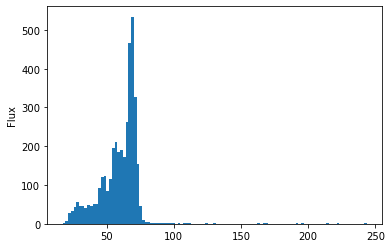

In [10]:
plt.hist(spectrum_data['flux'], bins='auto')
plt.ylabel('Flux')
plt.show()

### Spectrum Display

To visualize the spectrum of this galaxy, we plot the column ['flux'] vs. column ['loglam'].

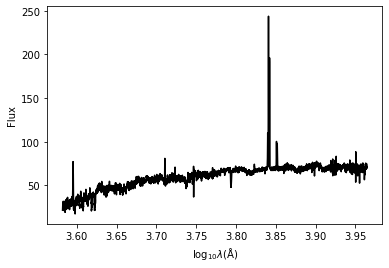

In [11]:
plt.plot(spectrum_data['loglam'],spectrum_data['flux'],'k')
plt.xlabel(r'$\log_{10} \lambda {(\rm \AA)}$')
plt.ylabel('Flux')
plt.show()

If we want to use the wavelength (and not its logarithm), we define

In [12]:
wavelength = np.power(10,spectrum_data['loglam'])

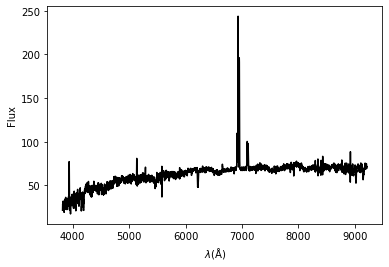

In [13]:
plt.plot(wavelength,spectrum_data['flux'],'k')
plt.xlabel(r'$\lambda {(\rm \AA)}$')
plt.ylabel('Flux')
plt.show()